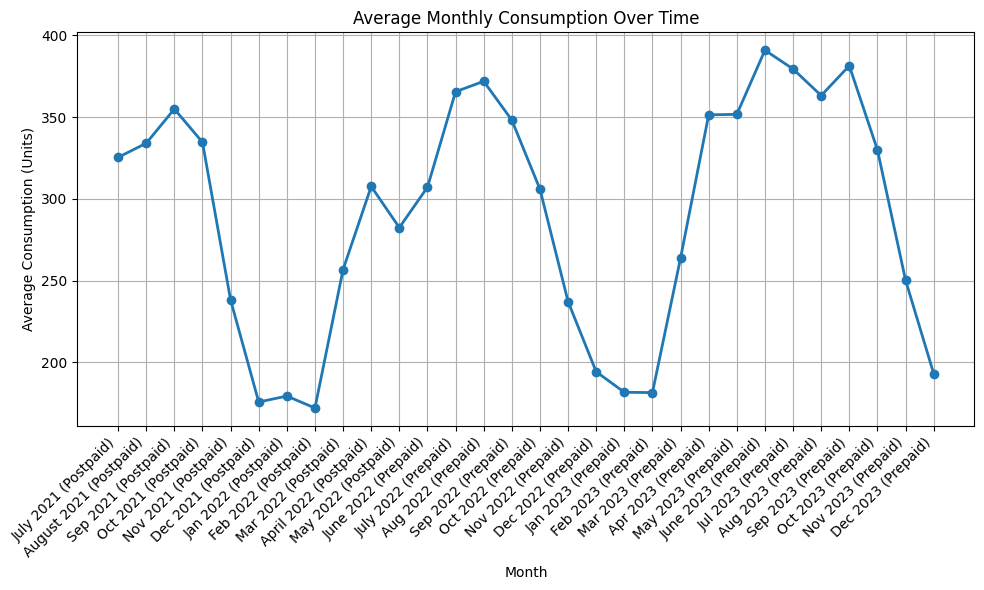

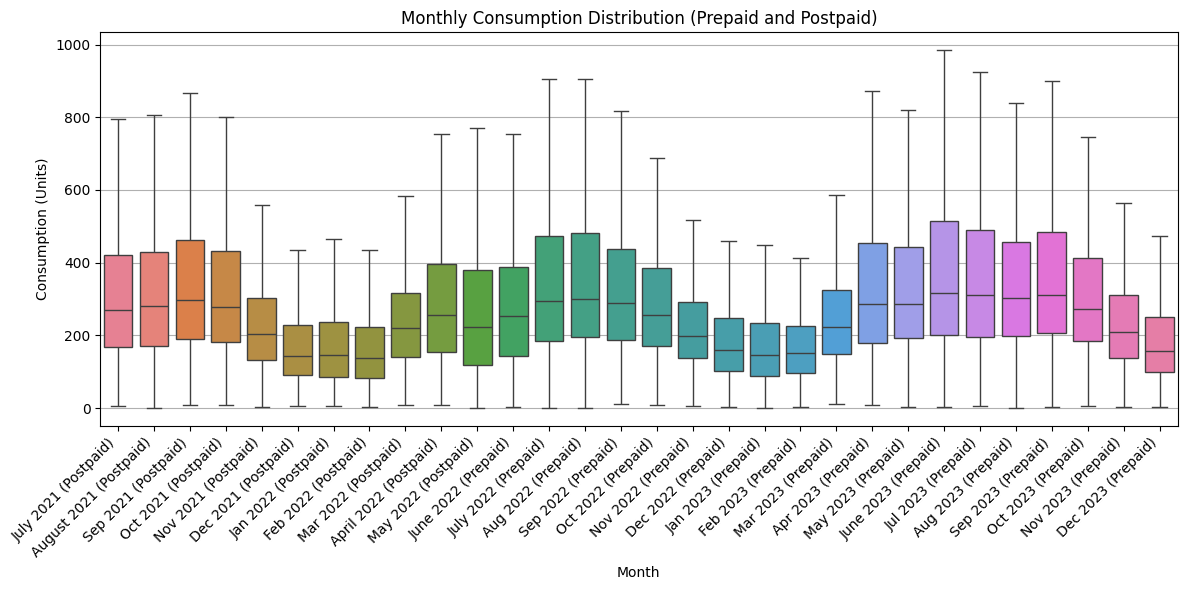

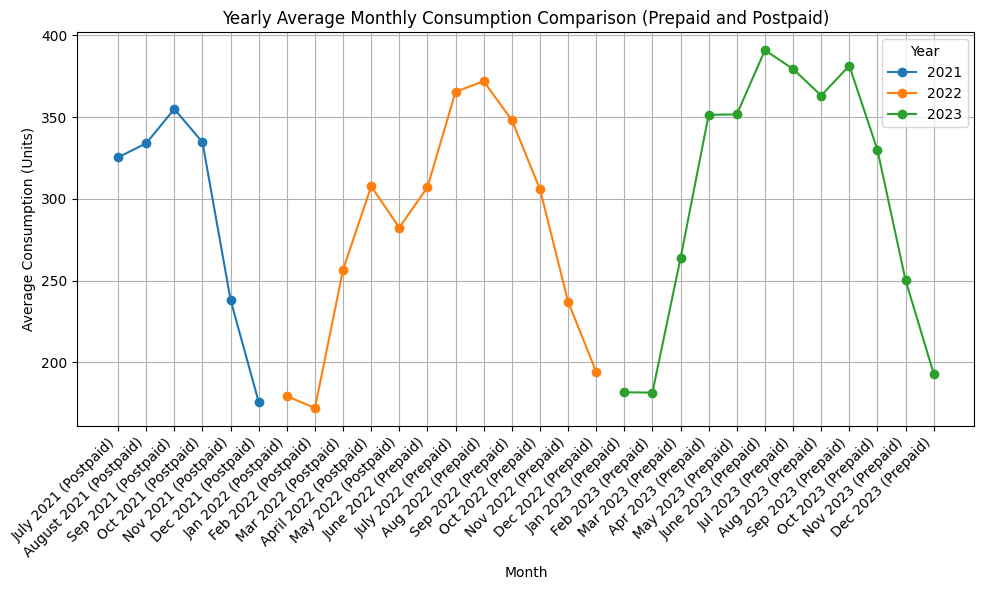

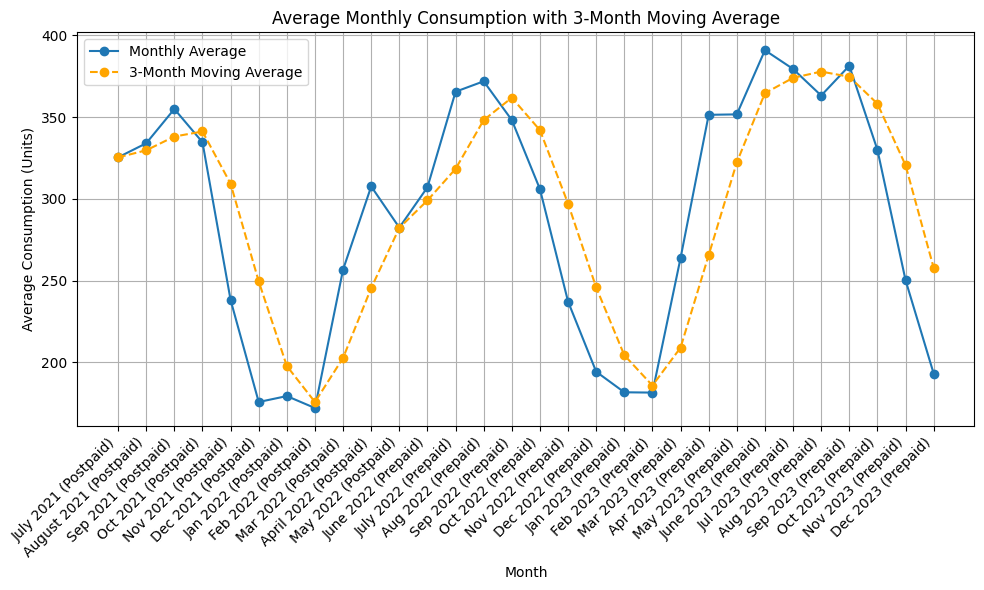

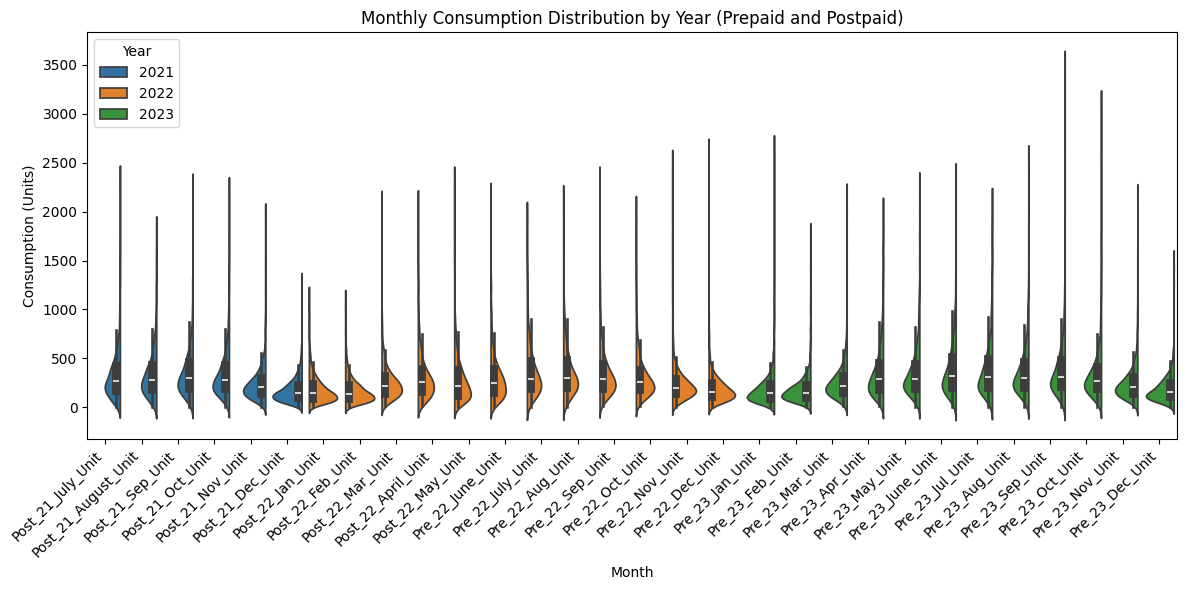

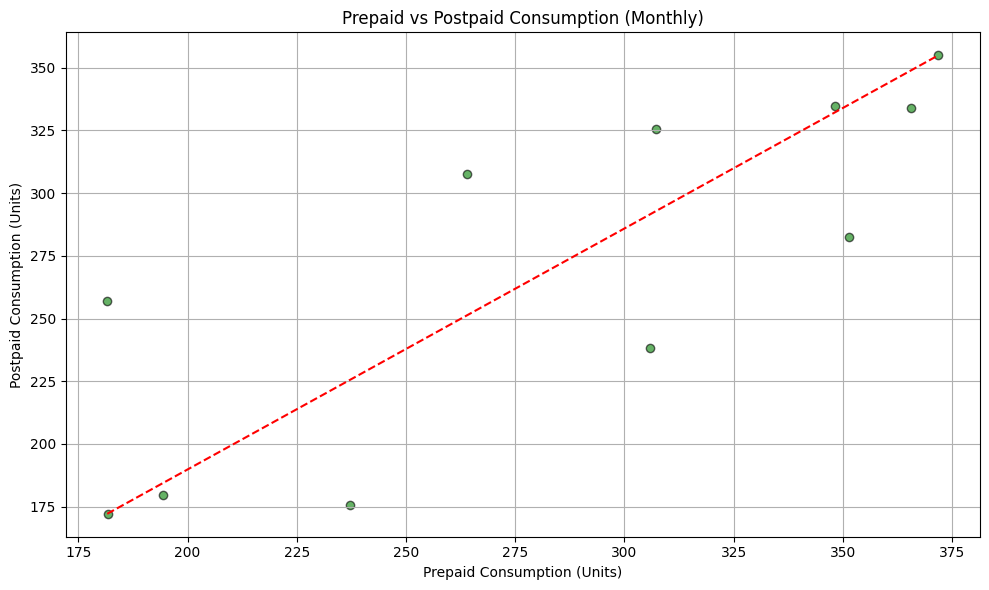

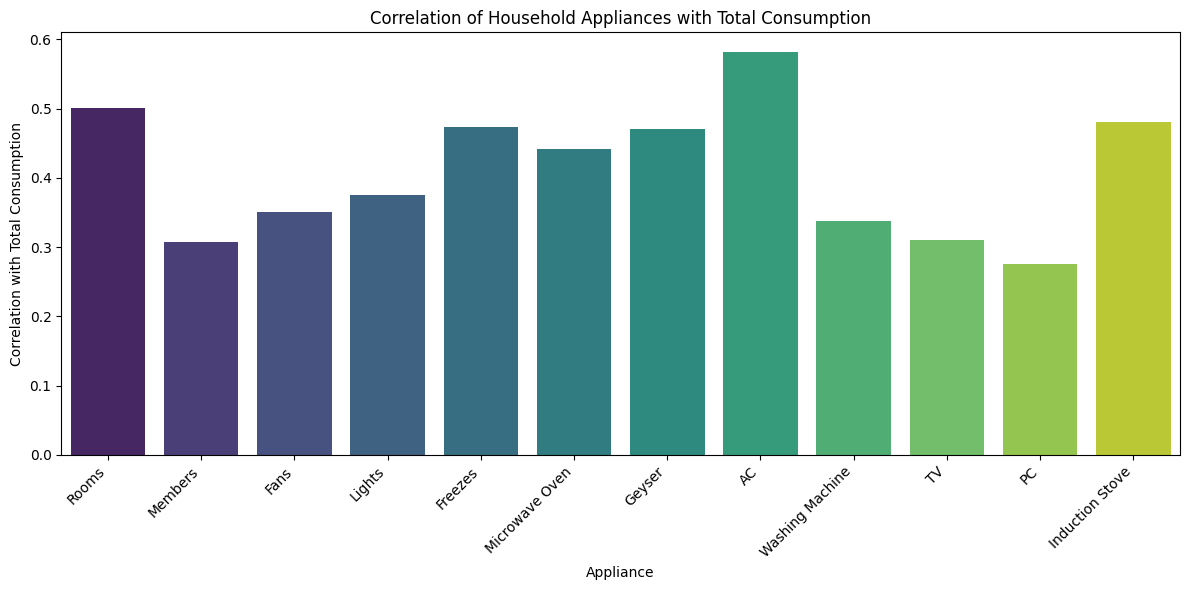

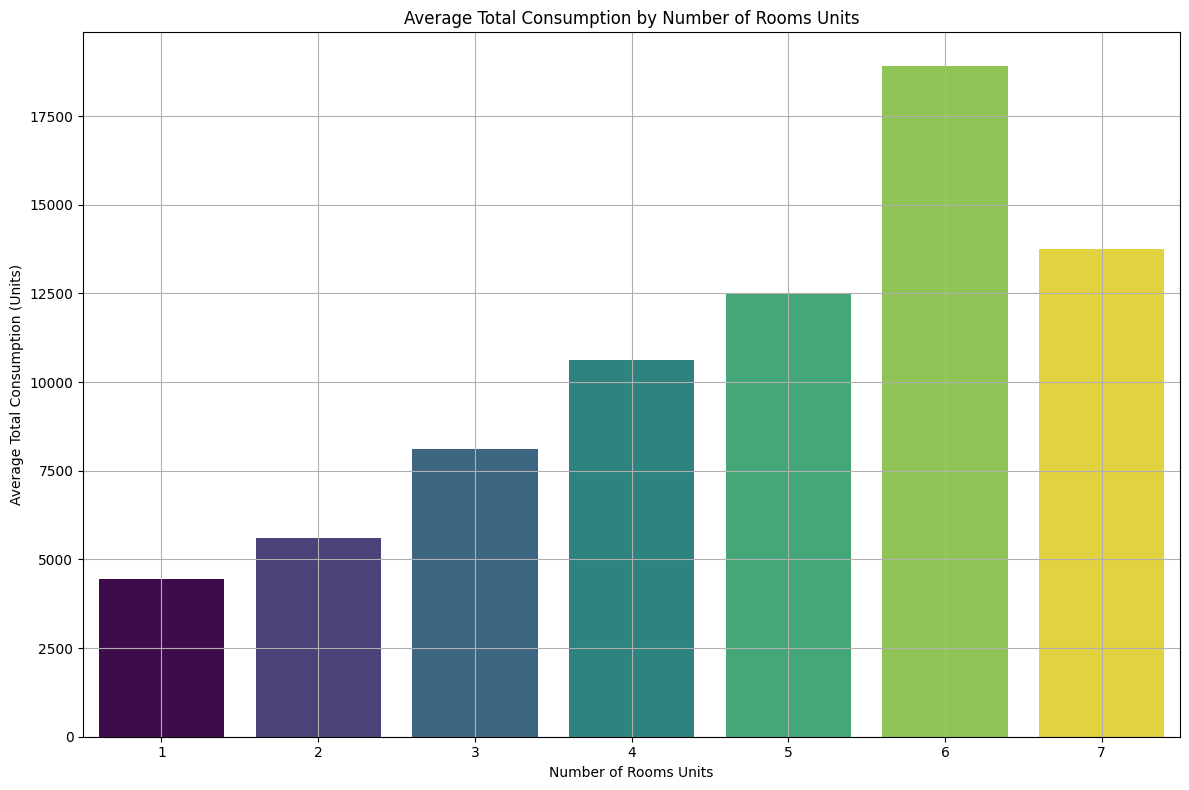

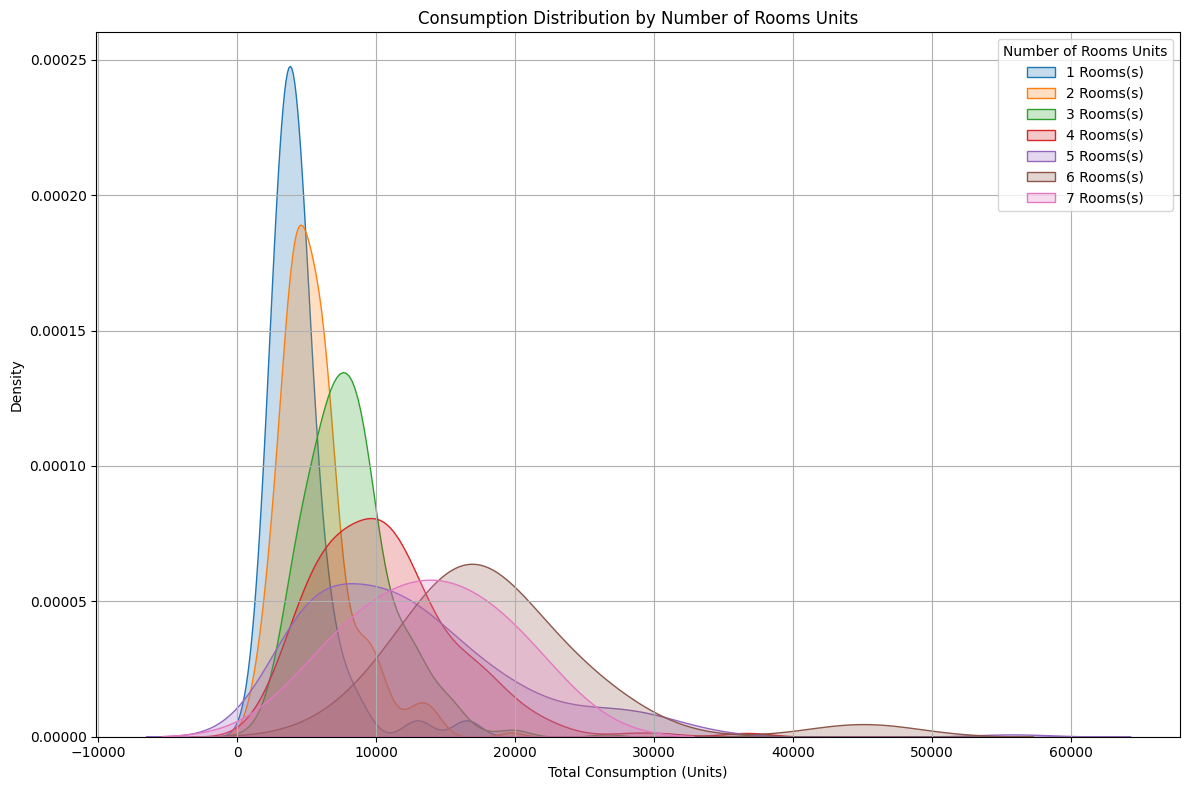

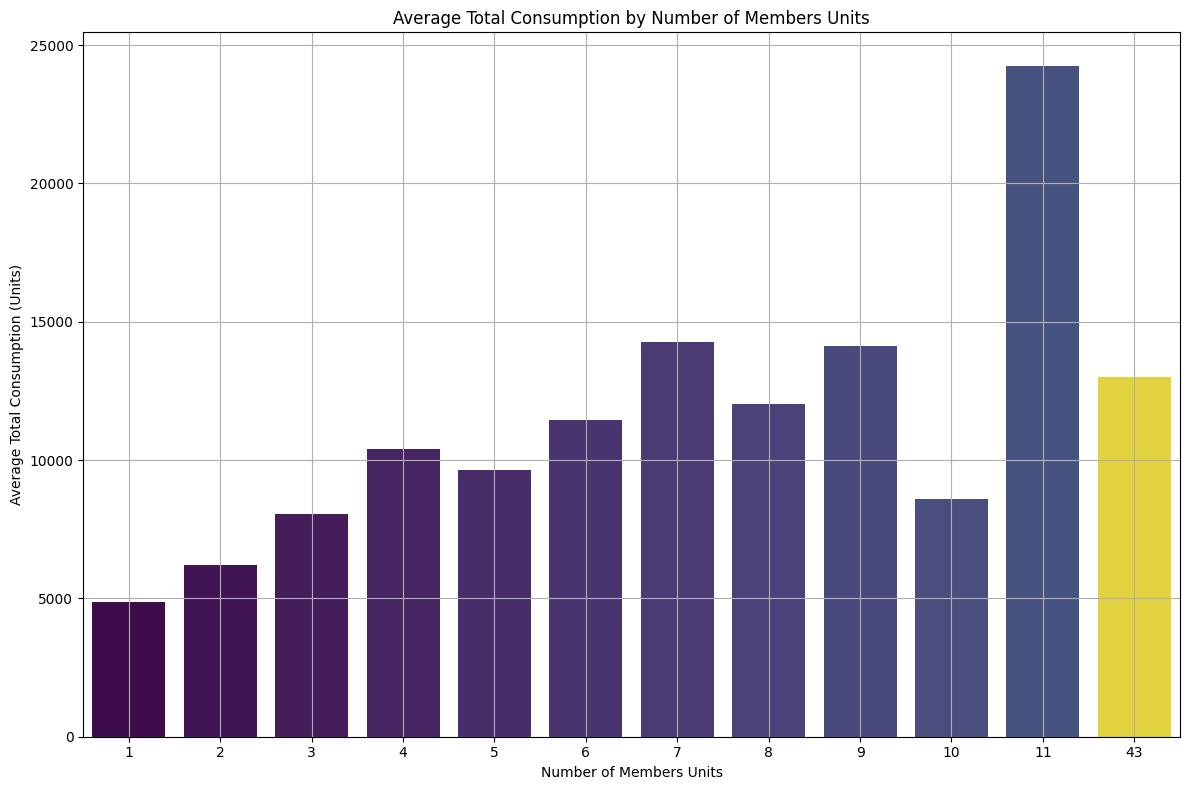

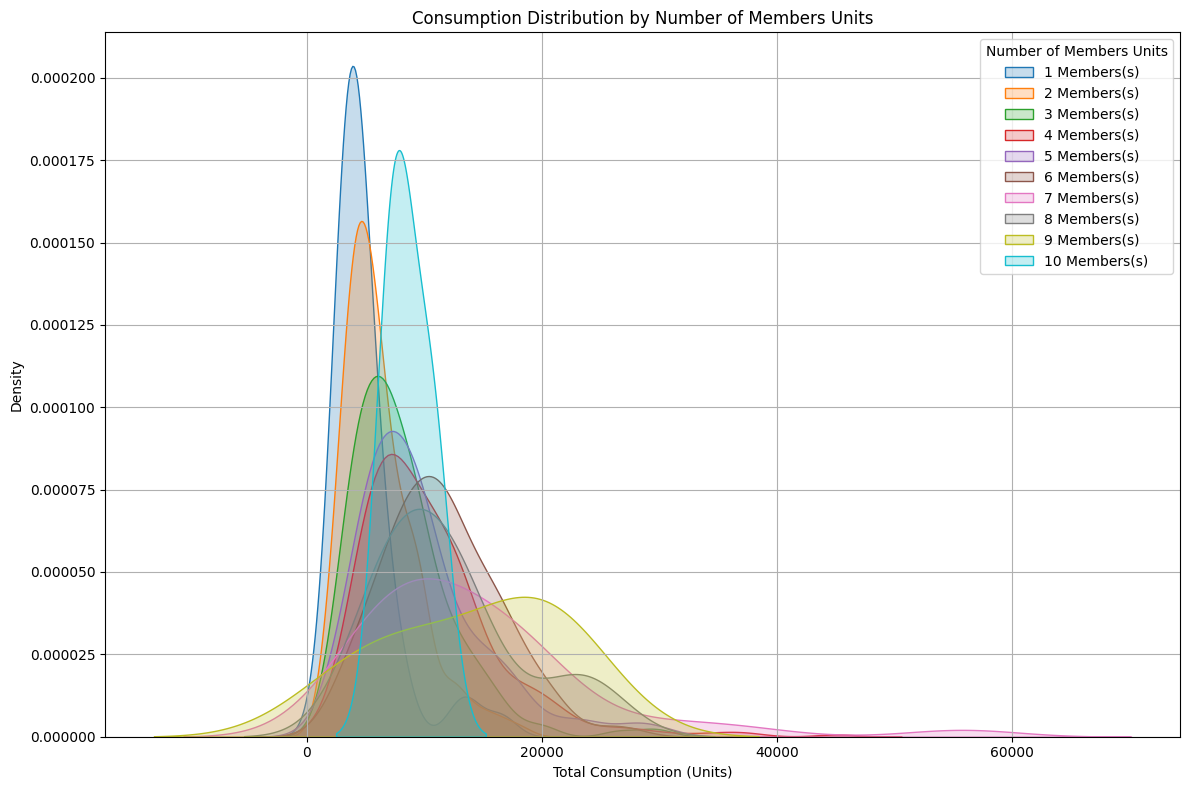

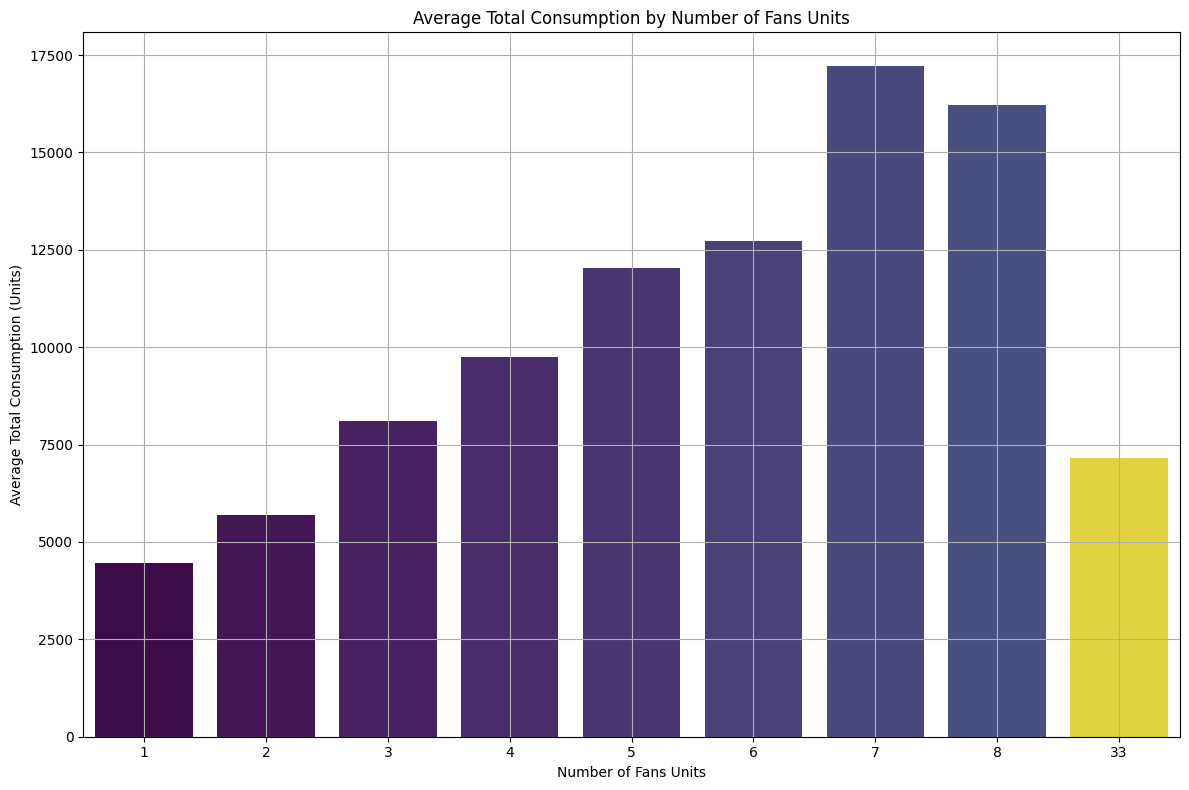

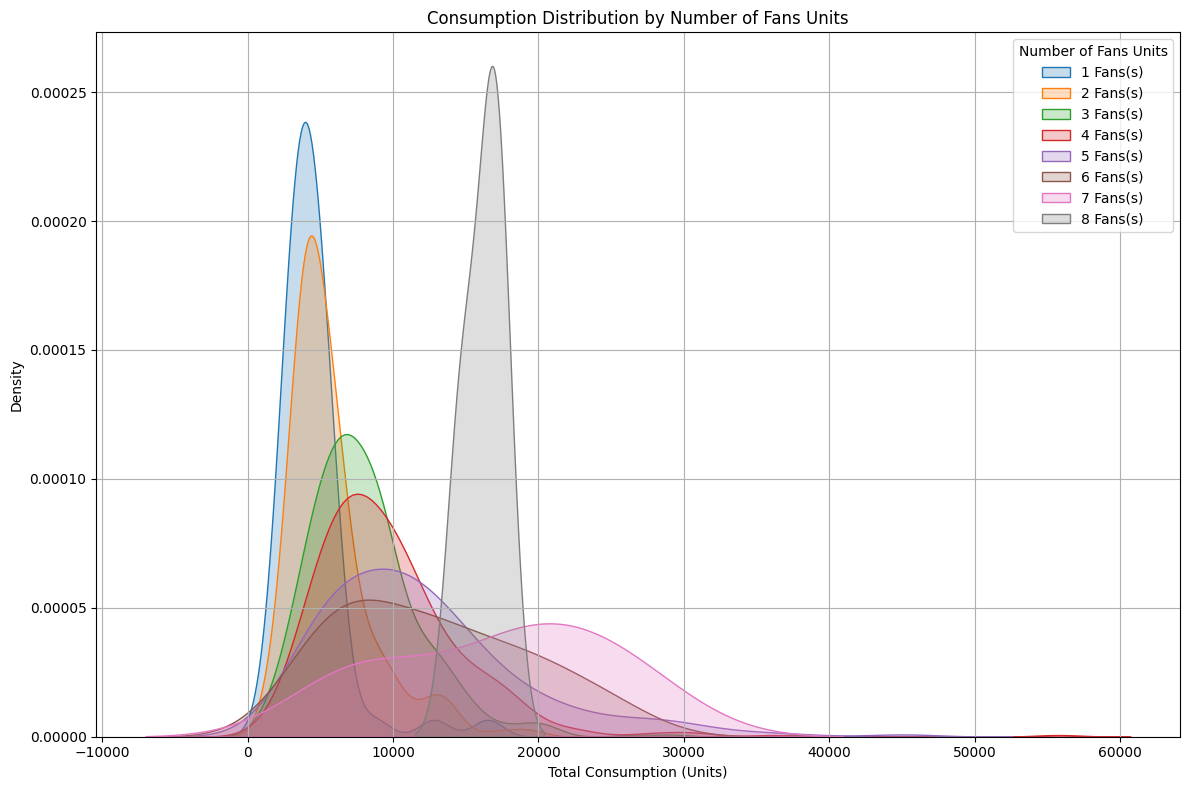

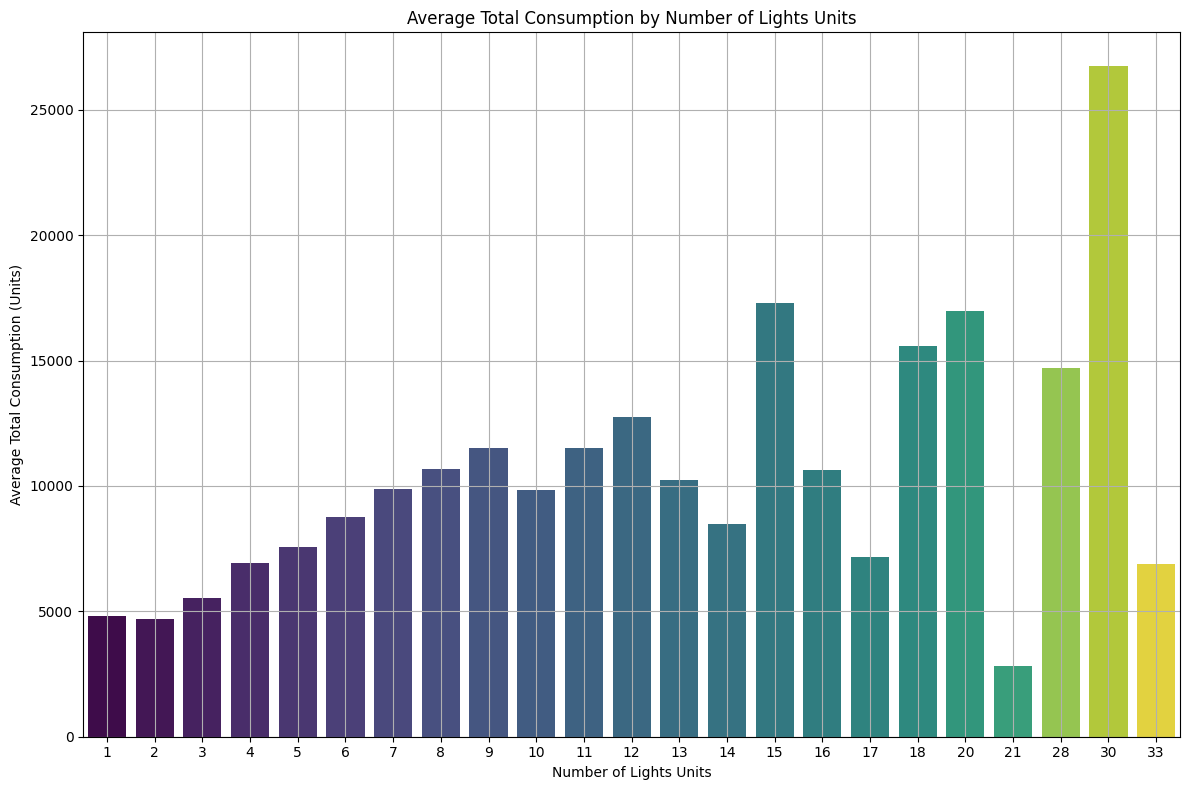

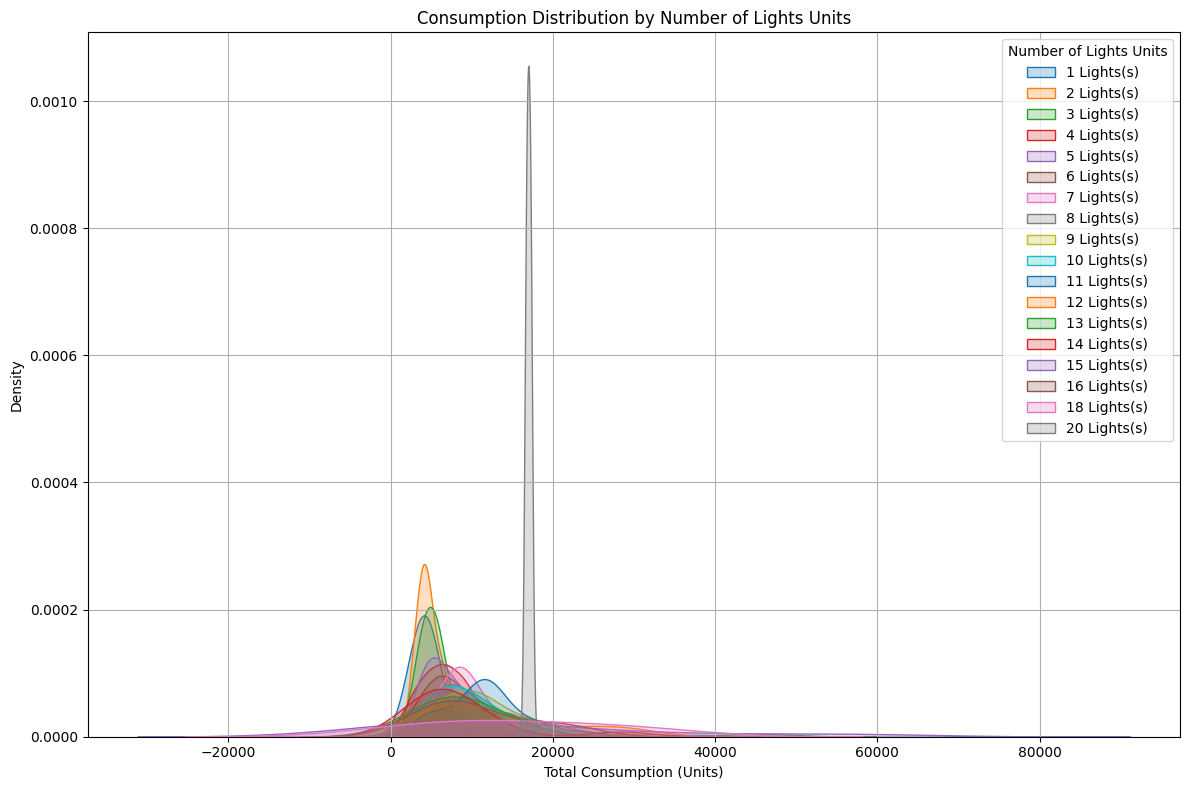

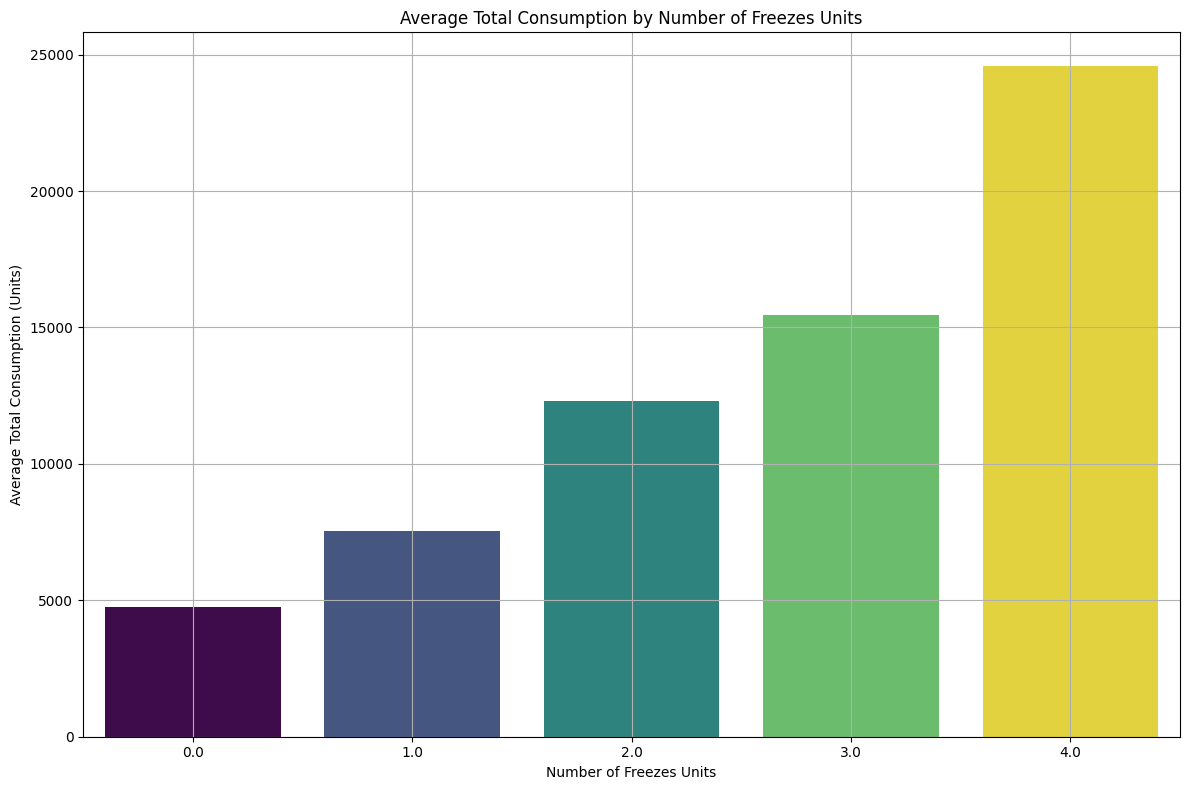

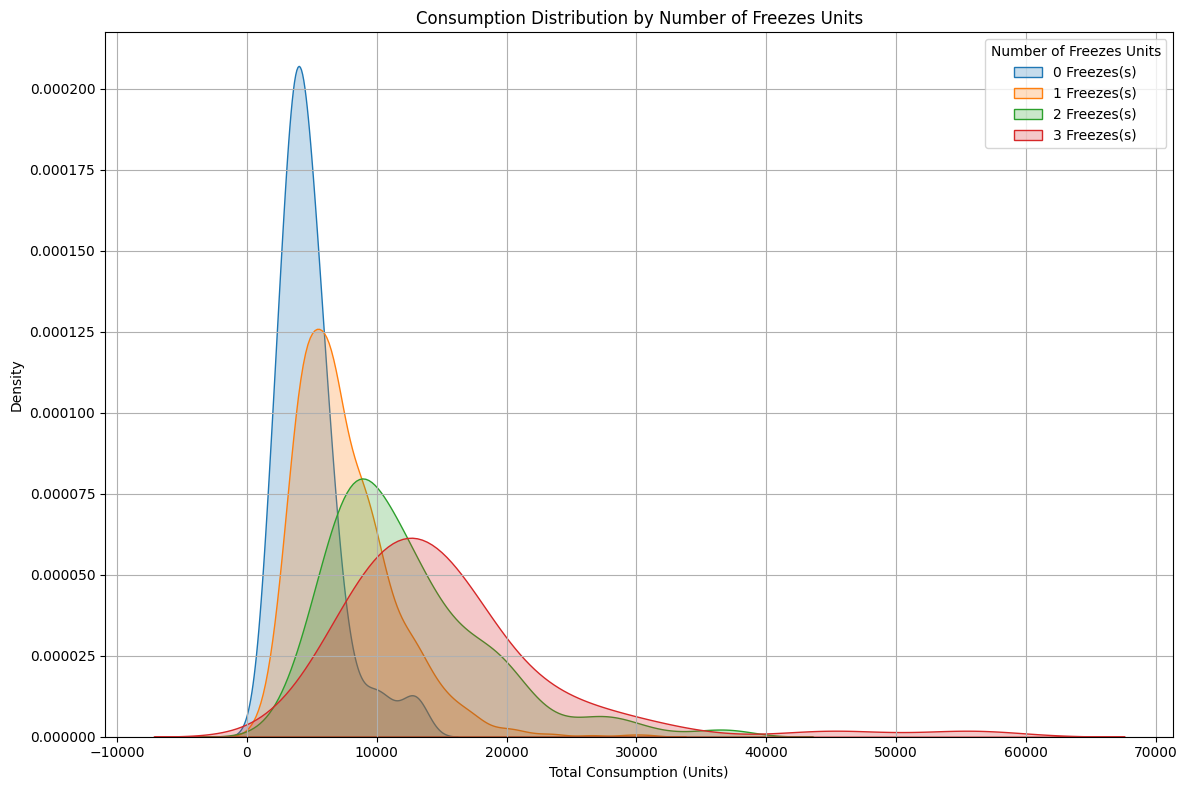

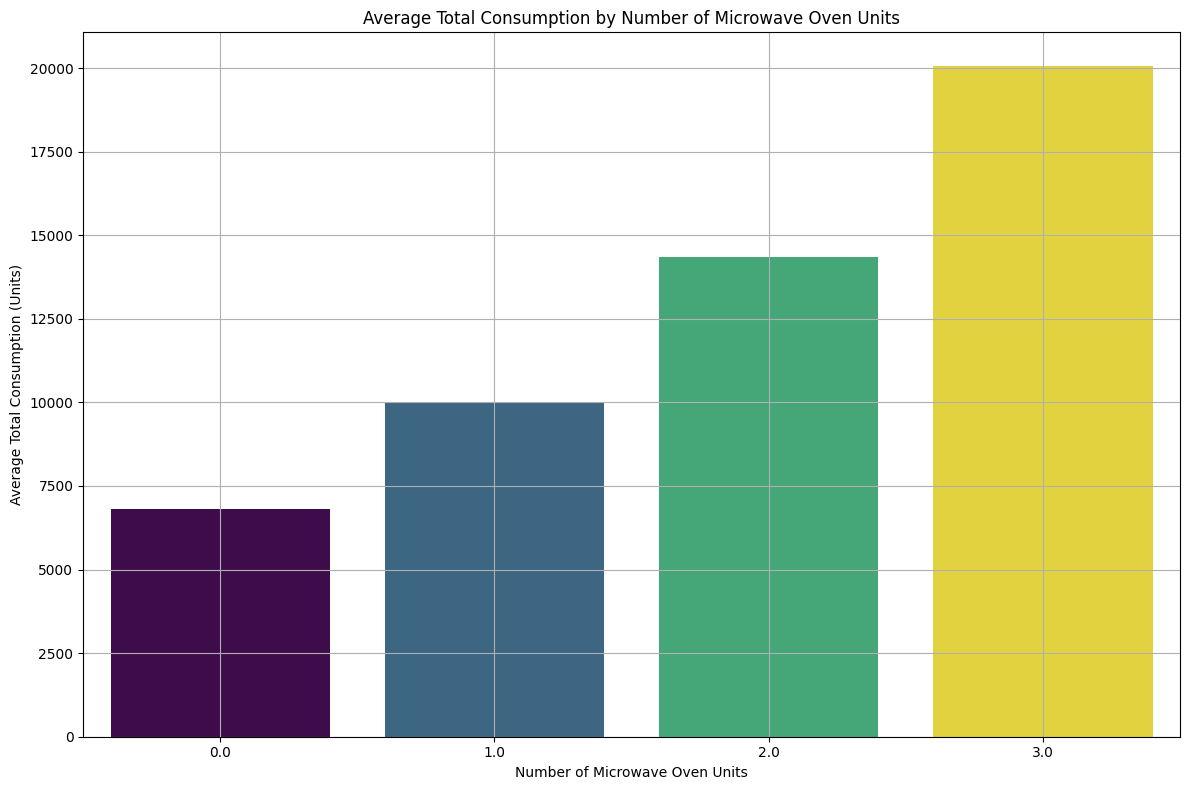

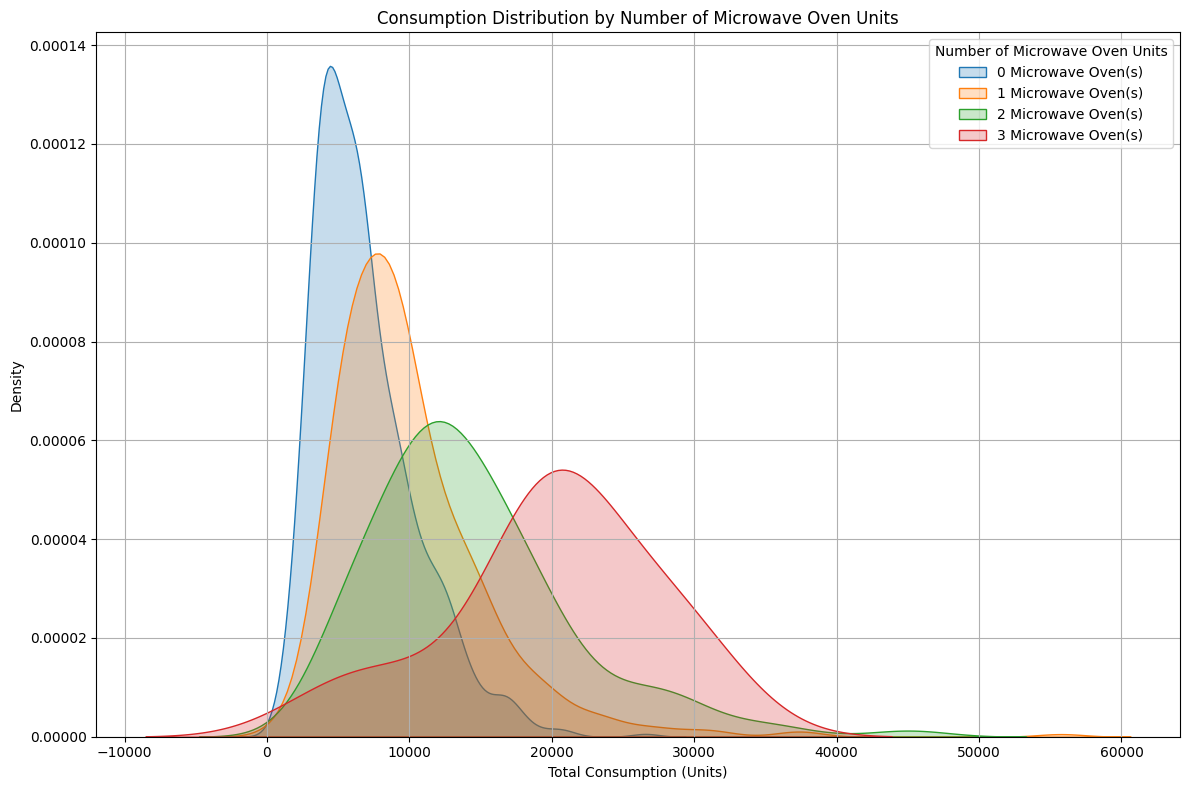

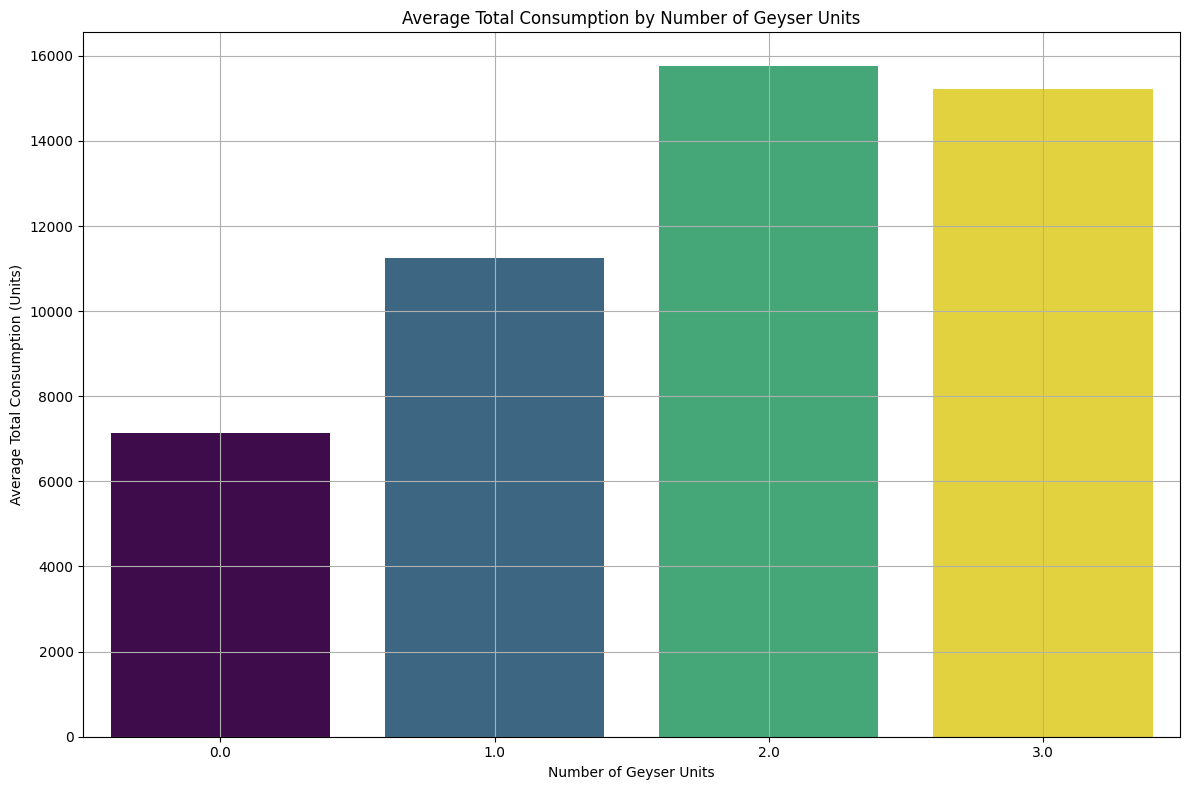

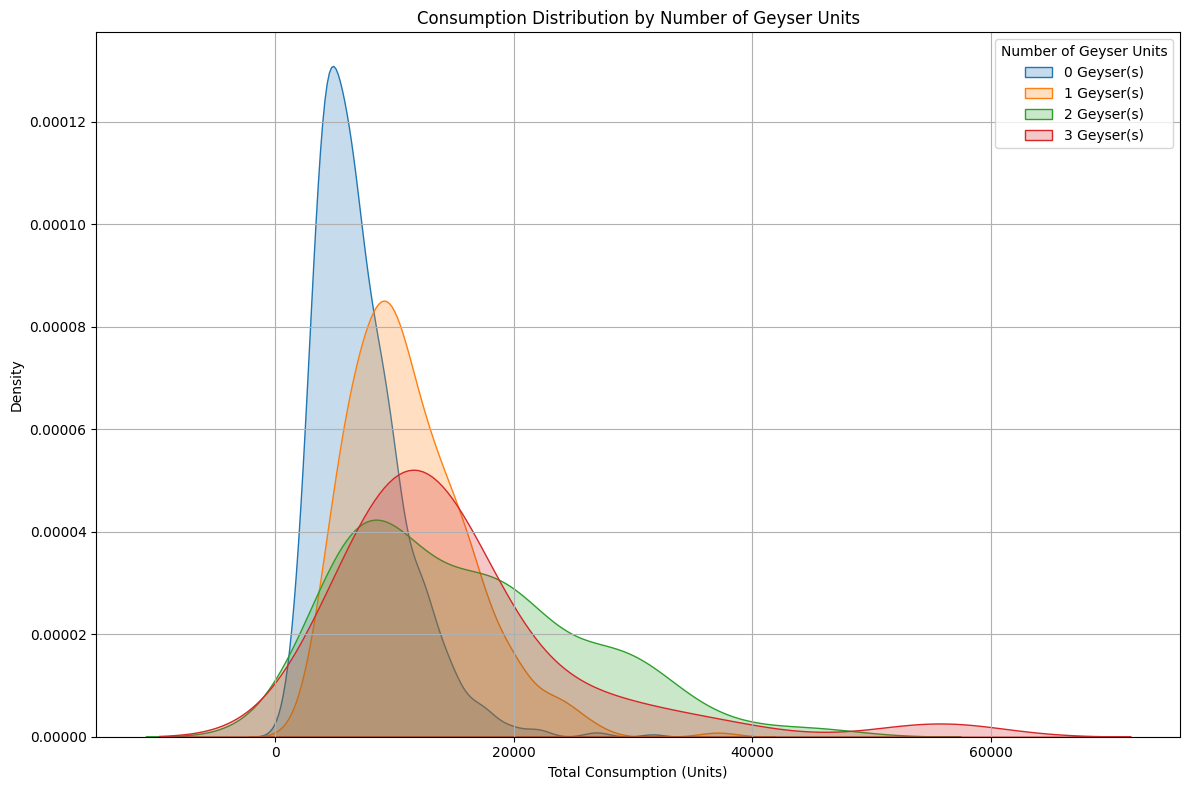

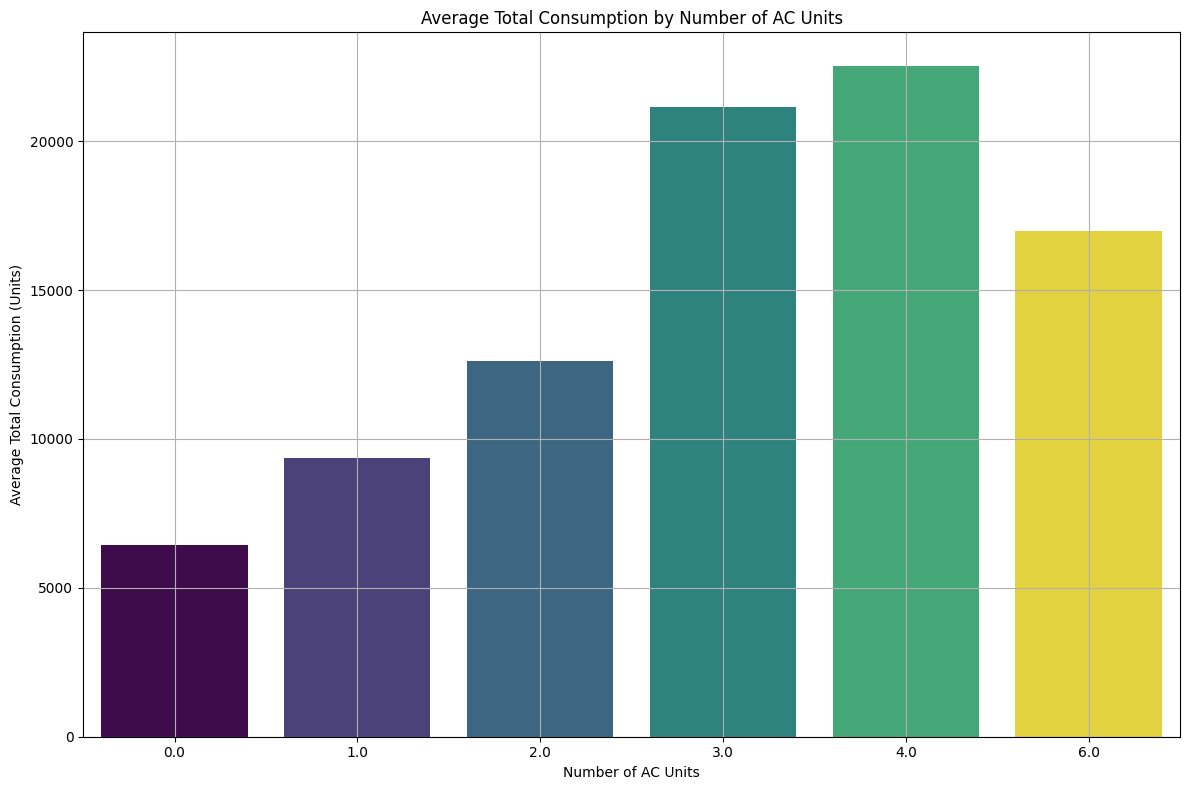

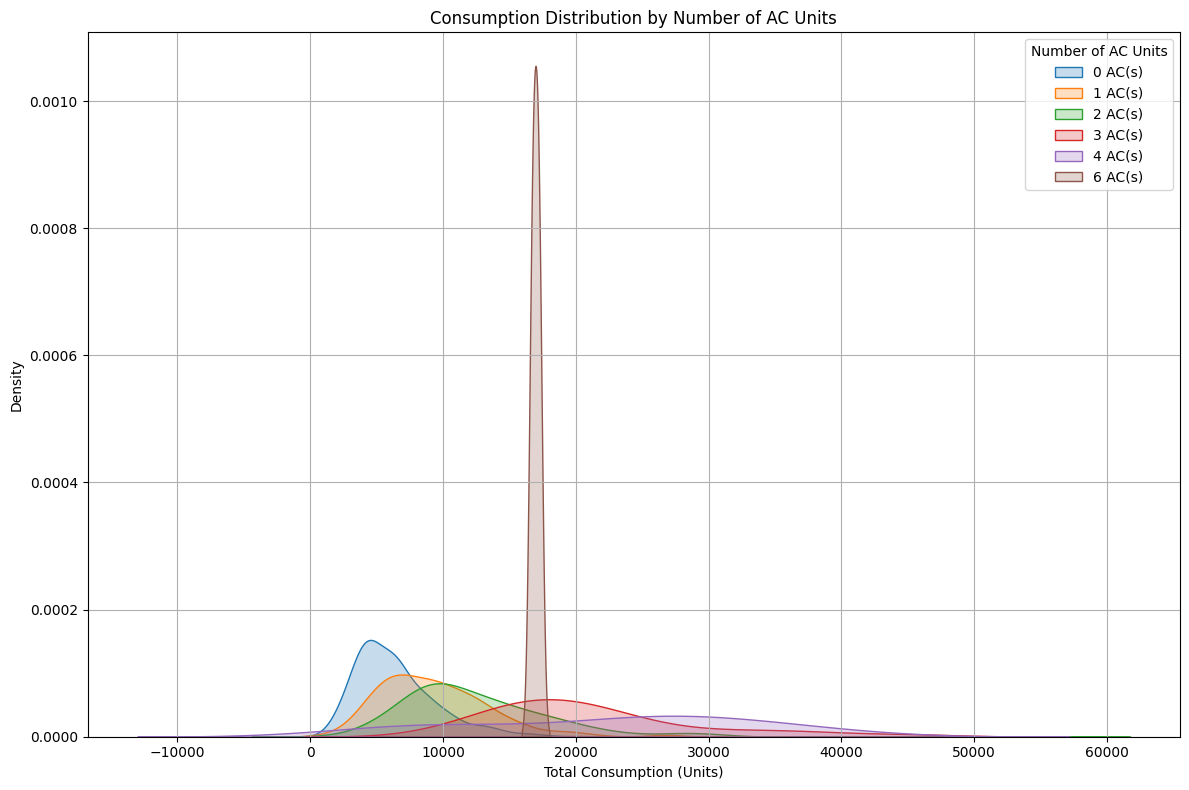

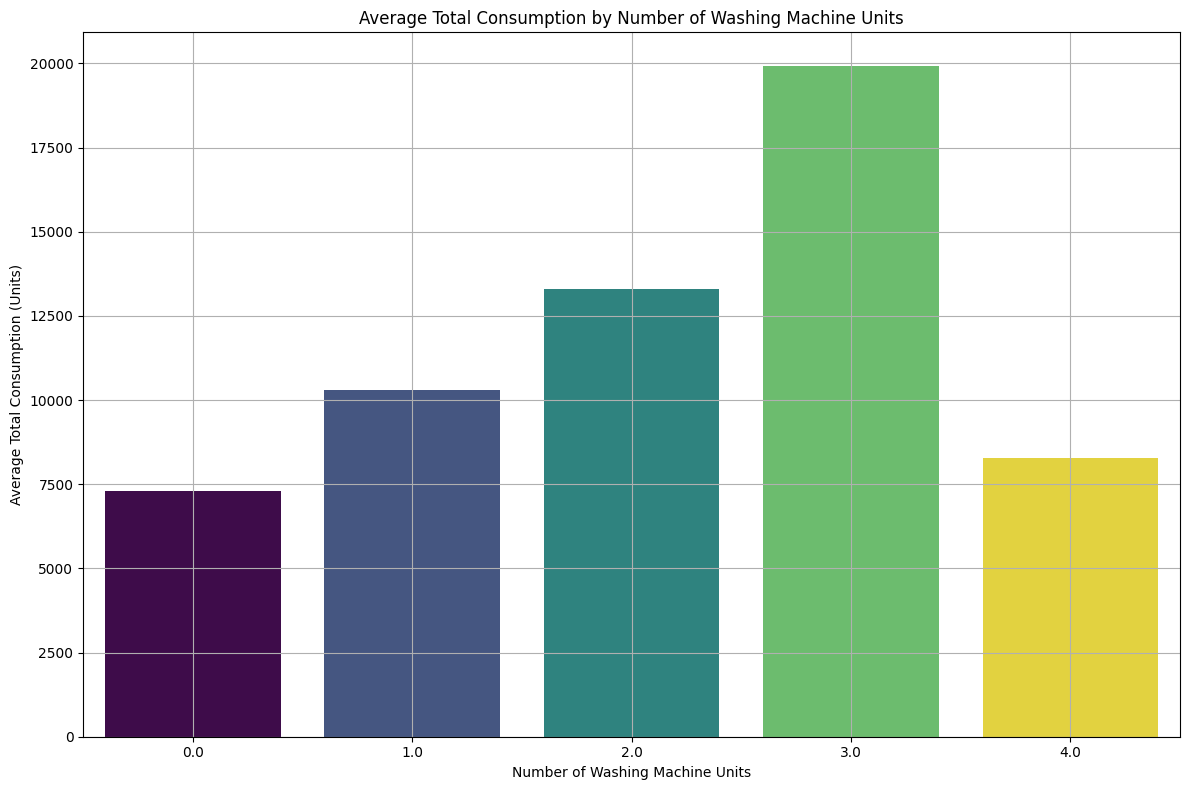

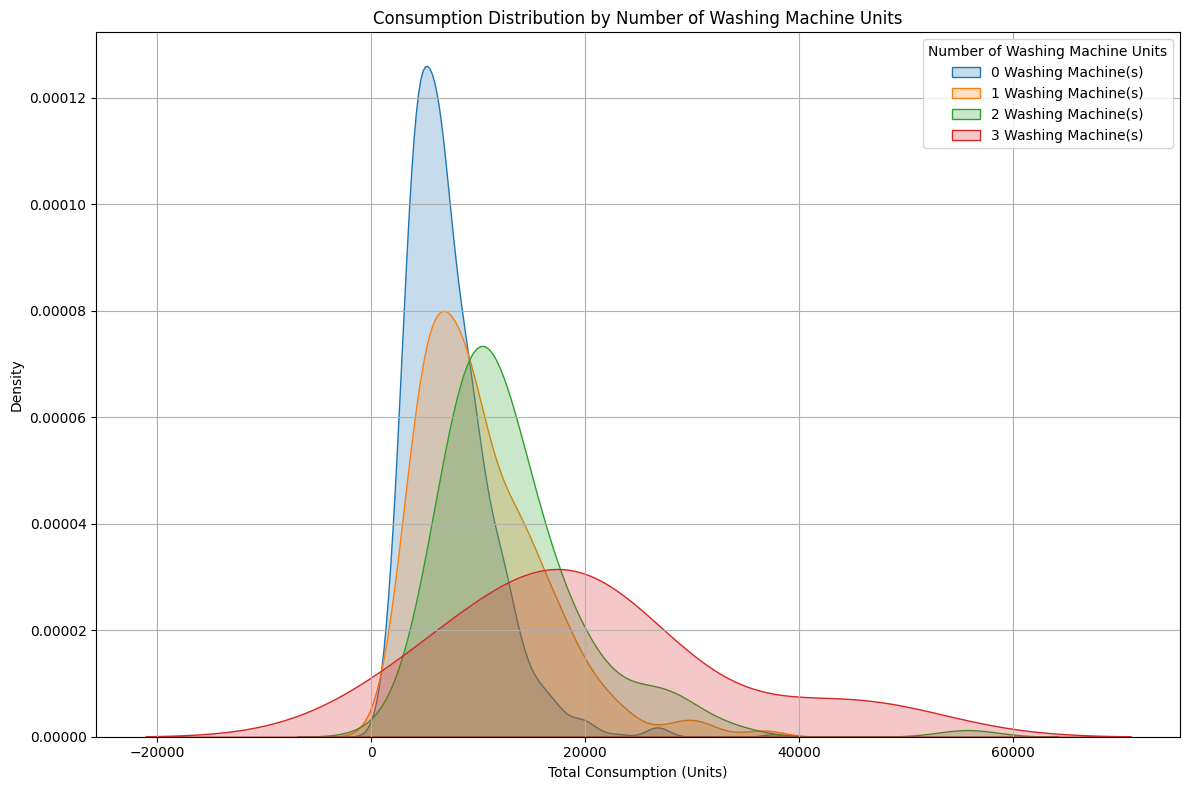

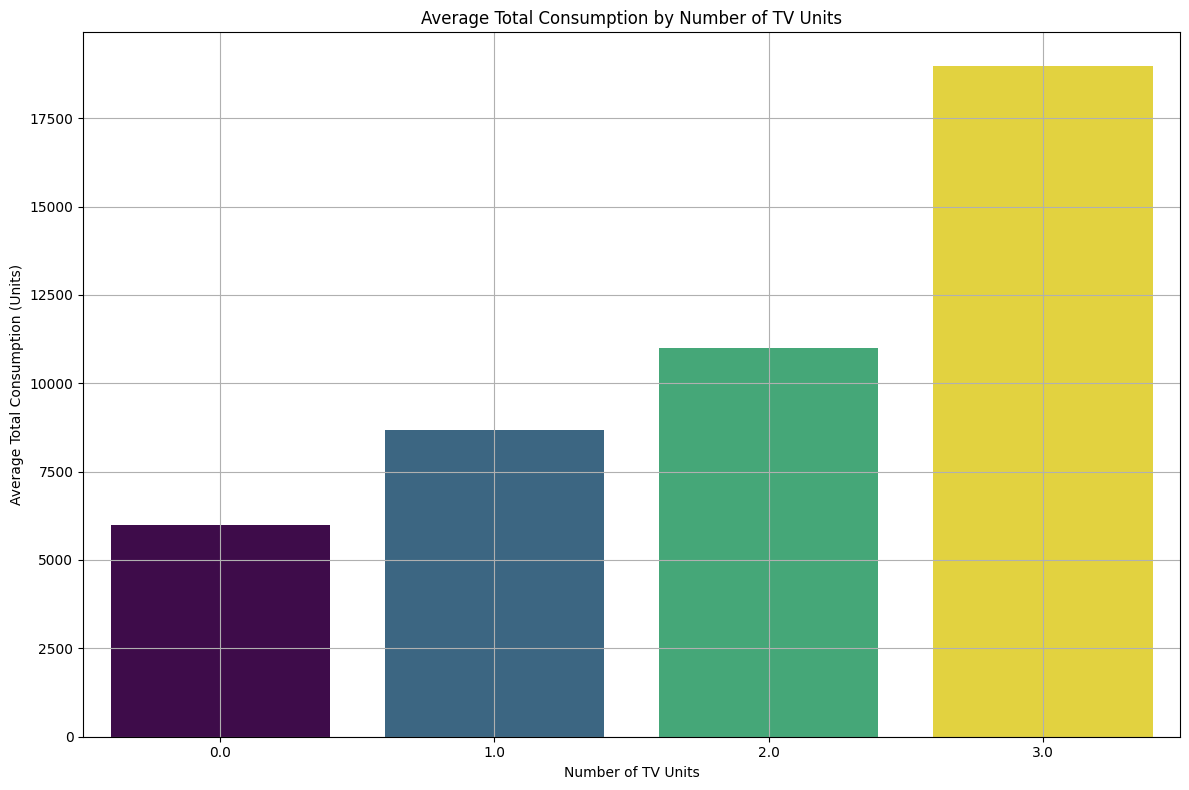

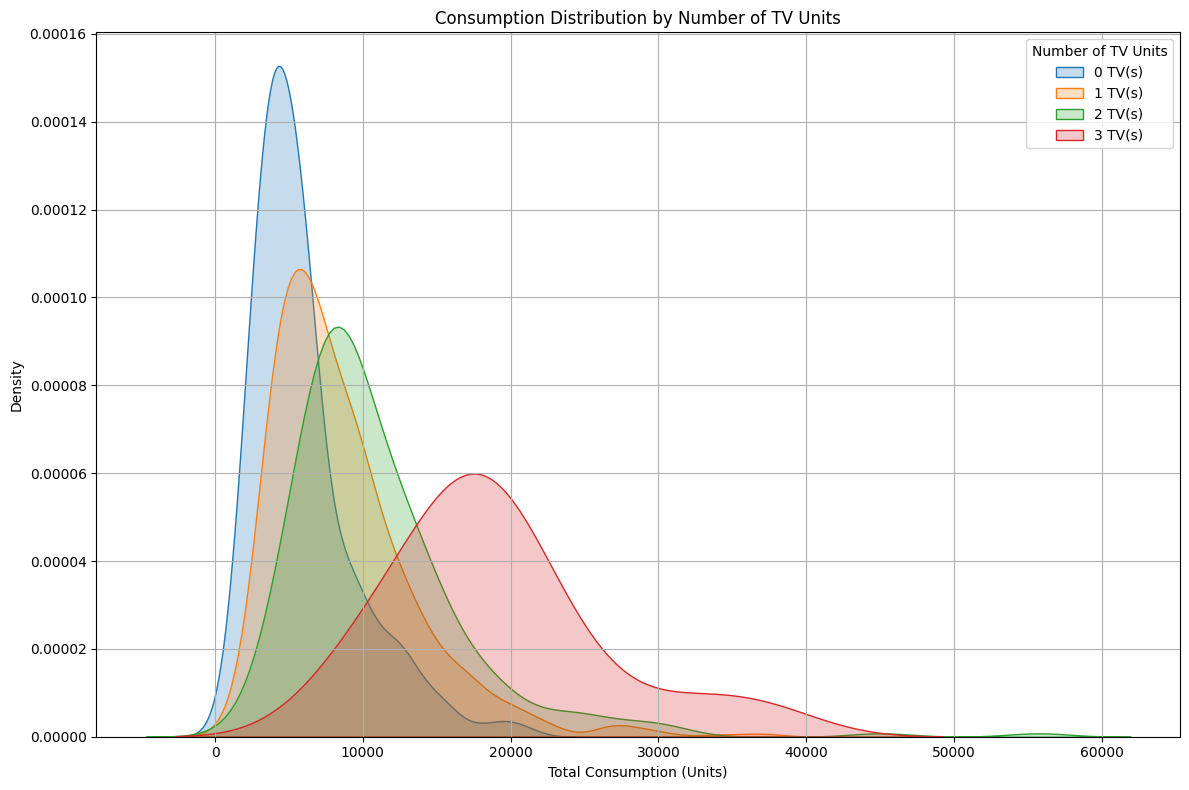

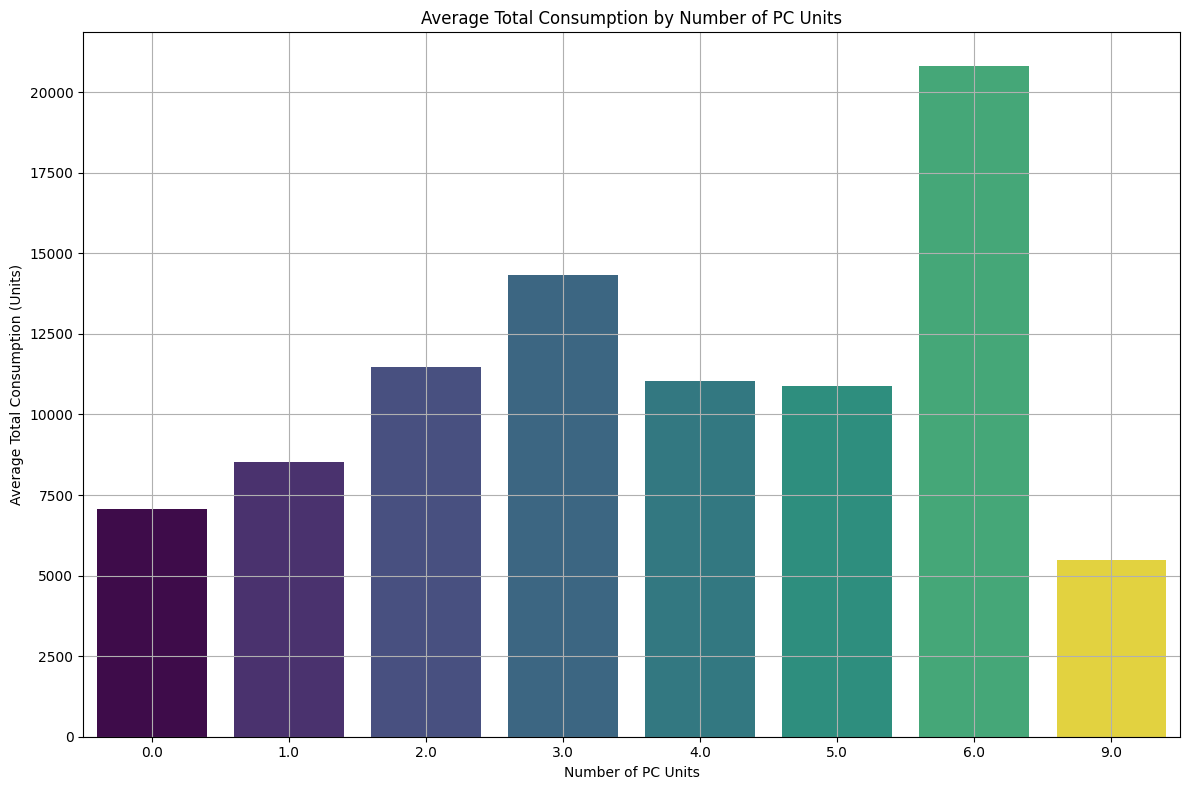

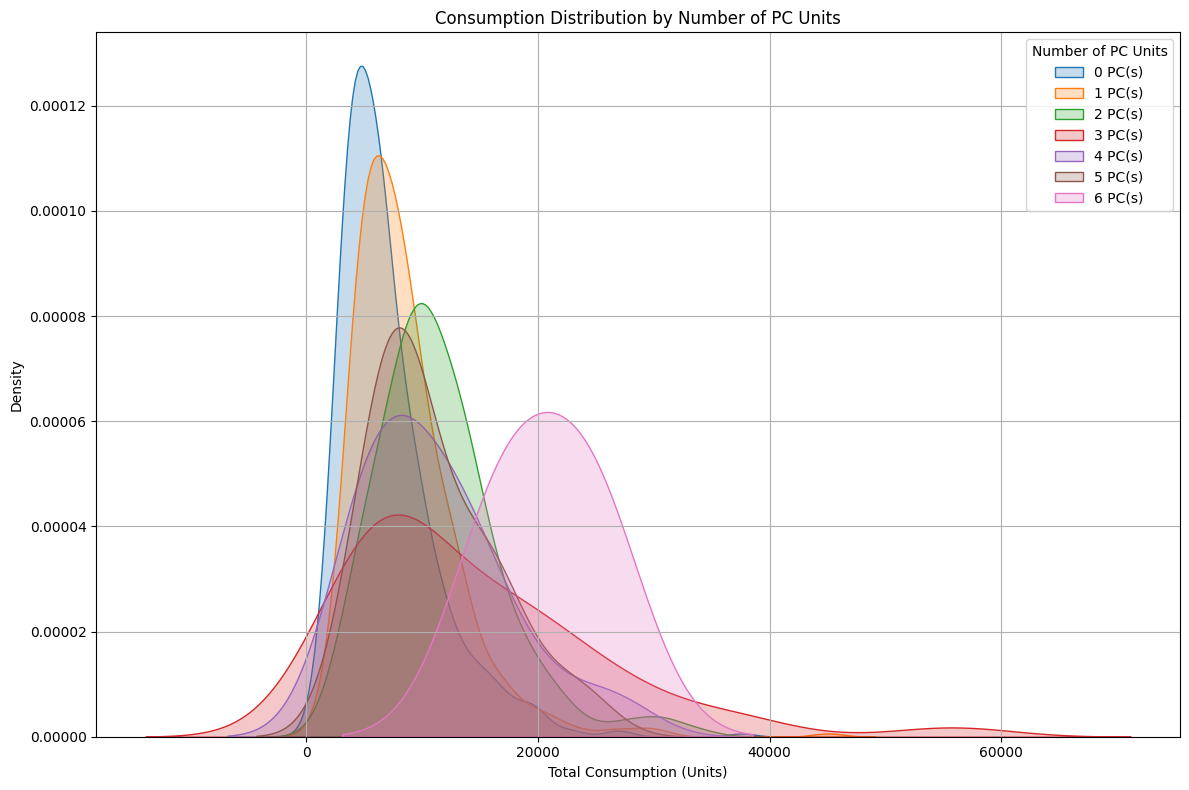

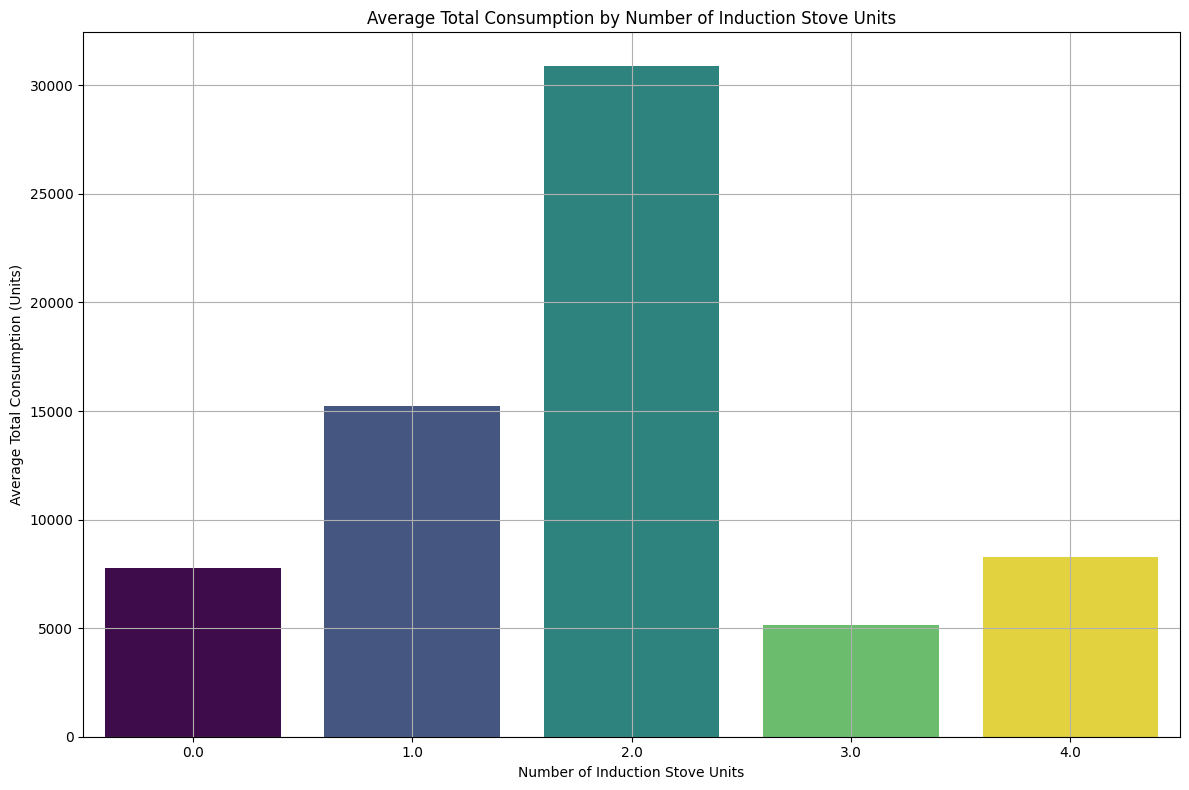

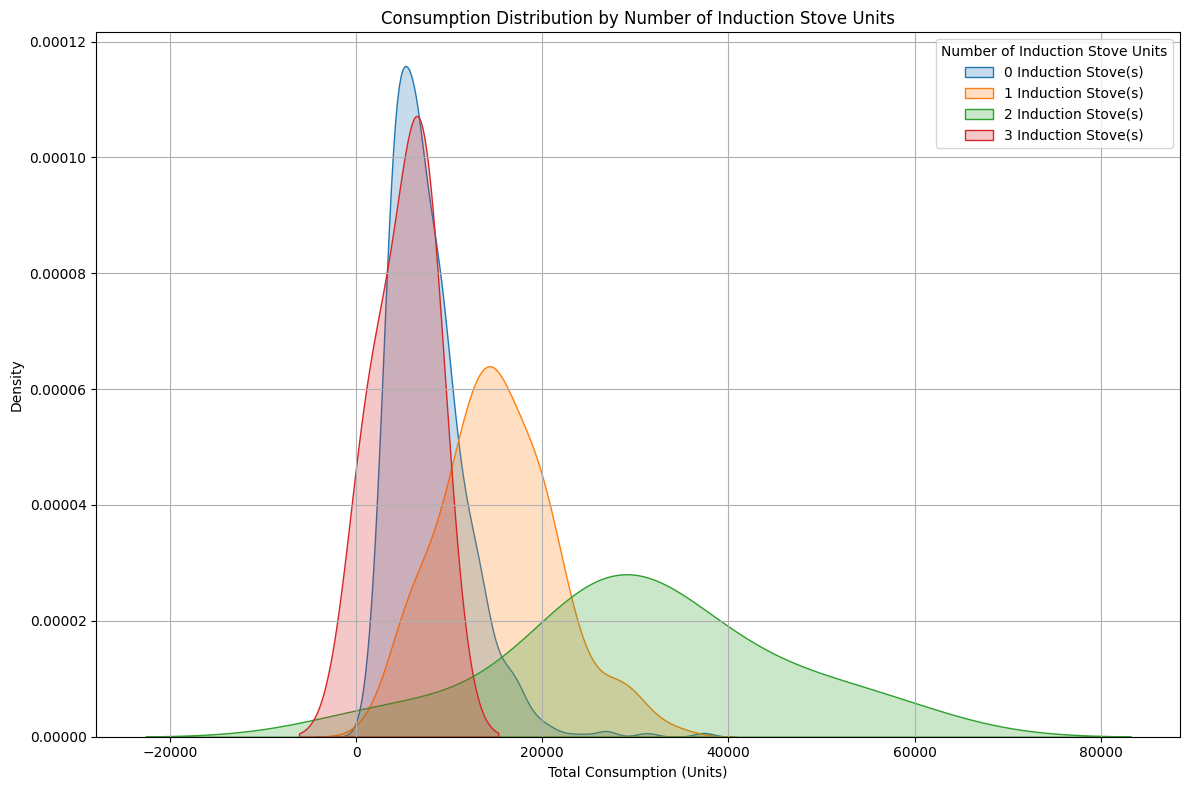

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Extract columns that represent monthly units
monthly_columns = [col for col in data.columns if '_unit' in col]

# Calculate the average monthly consumption across all customers
average_monthly_consumption = data[monthly_columns].apply(pd.to_numeric, errors='coerce').mean()

# Extract months for labeling in chronological order
months_mod = [
    col.replace('_unit', '')
       .replace('pre_', 'Prepaid: ')
       .replace('post_', 'Postpaid: ')
       .replace('21', '2021')
       .replace('22', '2022')
       .replace('23', '2023')
       .replace('_', ' ')
       .title()
    for col in monthly_columns
]

# Swap the position of month and year to be "Month Year"
months = [
    ' '.join([part.strip() for part in label.split(':')[1].split()[::-1]]) + f" ({label.split(':')[0]})"
    for label in months_mod
]

years = ['2021', '2022', '2023']

# Plot the time series of average monthly consumption
plt.figure(figsize=(10, 6))
plt.plot(months, average_monthly_consumption, marker='o', linestyle='-', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title('Average Monthly Consumption Over Time')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.grid(True)
plt.tight_layout()
plt.savefig('average_monthly_consumption.png', dpi=300)
plt.show()

# Corrected Box Plot: Monthly consumption distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[monthly_columns].apply(pd.to_numeric, errors='coerce'), showfliers=False)
plt.xticks(ticks=np.arange(len(months)), labels=months, rotation=45, ha='right')
plt.title('Monthly Consumption Distribution (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (Units)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('monthly_consumption_distribution.png', dpi=300)
plt.show()

# Yearly Trend Comparison
formatted_months = months
yearly_data = pd.DataFrame(index=formatted_months)
yearly_data['Average Consumption'] = average_monthly_consumption.values

# Line plot for yearly comparison
plt.figure(figsize=(10, 6))
for year in years:
    year_data = yearly_data[yearly_data.index.str.contains(year)]
    plt.plot(year_data.index, year_data['Average Consumption'], marker='o', label=f'{year}')

plt.xticks(rotation=45, ha='right')
plt.title('Yearly Average Monthly Consumption Comparison (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_average_comparison.png', dpi=300)
plt.show()

# Suggested New Visualizations
# 1. Consumption Trend with Moving Average
plt.figure(figsize=(10, 6))
rolling_avg = average_monthly_consumption.rolling(window=3, min_periods=1).mean()
plt.plot(months, average_monthly_consumption, marker='o', linestyle='-', label='Monthly Average')
plt.plot(months, rolling_avg, marker='o', linestyle='--', color='orange', label='3-Month Moving Average')
plt.xticks(rotation=45, ha='right')
plt.title('Average Monthly Consumption with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Average Consumption (Units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('average_monthly_with_moving_average.png', dpi=300)
plt.show()

# 2. Monthly Consumption Distribution by Year (Violin Plot)
plt.figure(figsize=(12, 6))
data_melted = pd.melt(data[monthly_columns].apply(pd.to_numeric, errors='coerce'), var_name='Month', value_name='Consumption')
data_melted['Year'] = data_melted['Month'].str.extract('(21|22|23)').replace({'21': '2021', '22': '2022', '23': '2023'})
data_melted['Month'] = data_melted['Month'].str.replace('pre_|post_|_unit', '').str.title()
sns.violinplot(x='Month', y='Consumption', hue='Year', data=data_melted, split=True)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Consumption Distribution by Year (Prepaid and Postpaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (Units)')
plt.tight_layout()
plt.savefig('monthly_consumption_violinplot.png', dpi=300)
plt.show()

# 3. Scatter Plot for Prepaid vs Postpaid Consumption (Monthly)
plt.figure(figsize=(10, 6))
prepaid_values = data[monthly_columns].filter(like='pre_').apply(pd.to_numeric, errors='coerce').mean().values
postpaid_values = data[monthly_columns].filter(like='post_').apply(pd.to_numeric, errors='coerce').mean().values

# Ensure both arrays are the same length by trimming to the minimum length
min_length = min(len(prepaid_values), len(postpaid_values))
prepaid_values = prepaid_values[:min_length]
postpaid_values = postpaid_values[:min_length]

plt.scatter(prepaid_values, postpaid_values, c='green', edgecolors='black', alpha=0.6)
plt.plot([min(prepaid_values), max(prepaid_values)], [min(postpaid_values), max(postpaid_values)], 'r--')
plt.xlabel('Prepaid Consumption (Units)')
plt.ylabel('Postpaid Consumption (Units)')
plt.title('Prepaid vs Postpaid Consumption (Monthly)')
plt.grid(True)
plt.tight_layout()
plt.savefig('prepaid_vs_postpaid_scatter.png', dpi=300)
plt.show()

# # 4. Heatmap of Average Monthly Consumption by Year and Type
# avg_data = pd.DataFrame({'Prepaid': prepaid_values, 'Postpaid': postpaid_values}, index=months[:min_length])
# plt.figure(figsize=(10, 6))
# sns.heatmap(avg_data.T, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
# plt.title('Average Monthly Consumption by Year and Type')
# plt.xlabel('Month')
# plt.ylabel('Type')
# plt.tight_layout()
# plt.savefig('average_consumption_heatmap.png', dpi=300)
# plt.show()

# 5. Bar Plot of Household Appliances vs Total Consumption
appliance_columns = ['Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven', 'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove']

# Check if all appliance columns exist in the dataset
existing_appliance_columns = [col for col in appliance_columns if col in data.columns]

# Calculate the correlation of each appliance with total consumption
total_units = data[monthly_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
correlations = data[existing_appliance_columns].apply(pd.to_numeric, errors='coerce').corrwith(total_units)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, hue=correlations.index, palette='viridis', dodge=False, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Household Appliances with Total Consumption')
plt.xlabel('Appliance')
plt.ylabel('Correlation with Total Consumption')
plt.tight_layout()
plt.savefig('appliance_vs_total_consumption.png', dpi=300)
plt.show()

# Analysis of Appliance Consumption Correlation with Total Consumption
# Group customers by the number of AC, Geyser, Induction Stove, and Rooms units and compare total consumption
appliances = ['Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven',
                           'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove']
total_units = data[monthly_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
data['Total_Units'] = total_units

for appliance in appliances:
    plt.figure(figsize=(12, 8))
    appliance_consumption = pd.to_numeric(data[appliance], errors='coerce').fillna(0)
    data[appliance] = appliance_consumption
    appliance_groups = data.groupby(appliance)['Total_Units'].mean().sort_index()

    # Plot the average consumption for each appliance count group
    sns.barplot(x=appliance_groups.index, y=appliance_groups.values, hue=appliance_groups.index, palette='viridis', dodge=False, legend=False)
    plt.xlabel(f'Number of {appliance} Units')
    plt.ylabel('Average Total Consumption (Units)')
    plt.title(f'Average Total Consumption by Number of {appliance} Units')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{appliance.lower()}_vs_total_consumption_correlation.png', dpi=300)
    plt.show()

    # Show consumption distribution for different appliance groups
    plt.figure(figsize=(12, 8))
    for count in sorted(appliance_groups.index):
        subset = data[data[appliance] == count]
        if len(subset) > 1:  # Avoid KDE for single or no data points
            sns.kdeplot(subset['Total_Units'], label=f'{int(count)} {appliance}(s)', fill=True, warn_singular=False)

    plt.xlabel('Total Consumption (Units)')
    plt.ylabel('Density')
    plt.title(f'Consumption Distribution by Number of {appliance} Units')
    plt.legend(title=f'Number of {appliance} Units')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{appliance.lower()}_consumption_distribution.png', dpi=300)
    plt.show()

C:\Users\Shadow\AppData\Local\Temp\ipykernel_8744\2871609080.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data[col] = pd.to_numeric(comparison_data[col], errors='coerce')


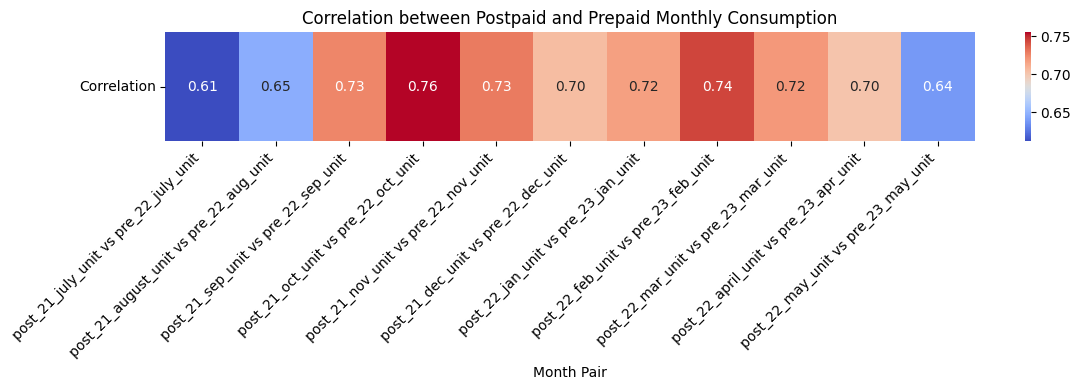

In [2]:


# Define the columns for prepaid and postpaid comparisons
prepaid_columns = [
    'pre_22_july_unit', 'pre_22_aug_unit', 'pre_22_sep_unit', 
    'pre_22_oct_unit', 'pre_22_nov_unit', 'pre_22_dec_unit',
    'pre_23_jan_unit', 'pre_23_feb_unit', 'pre_23_mar_unit', 
    'pre_23_apr_unit', 'pre_23_may_unit'
]

postpaid_columns = [
    'post_21_july_unit', 'post_21_august_unit', 'post_21_sep_unit', 
    'post_21_oct_unit', 'post_21_nov_unit', 'post_21_dec_unit',
    'post_22_jan_unit', 'post_22_feb_unit', 'post_22_mar_unit', 
    'post_22_april_unit', 'post_22_may_unit'
]

# Create a DataFrame for the pairwise comparison
comparison_data = data[postpaid_columns + prepaid_columns]

# Convert the selected columns to numeric, handling non-numeric entries by setting errors='coerce' to NaN
for col in postpaid_columns + prepaid_columns:
    comparison_data[col] = pd.to_numeric(comparison_data[col], errors='coerce')

# Calculate pairwise correlation between each postpaid and the corresponding prepaid month
correlation_values = [
    comparison_data[post].corr(comparison_data[pre])
    for post, pre in zip(postpaid_columns, prepaid_columns)
]

# Create a DataFrame for the correlation values
correlation_df = pd.DataFrame({
    'Month Pair': [
        'July', 'August', 'September', 'October', 'November', 'December',
        'January', 'February', 'March', 'April', 'May'
    ],
    'Month Pair Label': [
        'post_21_july_unit vs pre_22_july_unit',
        'post_21_august_unit vs pre_22_aug_unit',
        'post_21_sep_unit vs pre_22_sep_unit',
        'post_21_oct_unit vs pre_22_oct_unit',
        'post_21_nov_unit vs pre_22_nov_unit',
        'post_21_dec_unit vs pre_22_dec_unit',
        'post_22_jan_unit vs pre_23_jan_unit',
        'post_22_feb_unit vs pre_23_feb_unit',
        'post_22_mar_unit vs pre_23_mar_unit',
        'post_22_april_unit vs pre_23_apr_unit',
        'post_22_may_unit vs pre_23_may_unit'
    ],
    'Correlation': correlation_values
})

# Set Month Pair as index for better labeling
correlation_df.set_index('Month Pair Label', inplace=True)

# Create a heatmap with proper labeling
# Create a heatmap with proper labeling
plt.figure(figsize=(12, 4))  # Increase the width for better label visibility
sns.heatmap(
    correlation_df[['Correlation']].T, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar=True, 
    xticklabels=True
)

# Customize the plot
plt.title('Correlation between Postpaid and Prepaid Monthly Consumption')
plt.xlabel('Month Pair')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("Correlation between Postpaid and Prepaid Monthly Consumption.png", dpi=300)
plt.show()



<Figure size 1000x600 with 0 Axes>

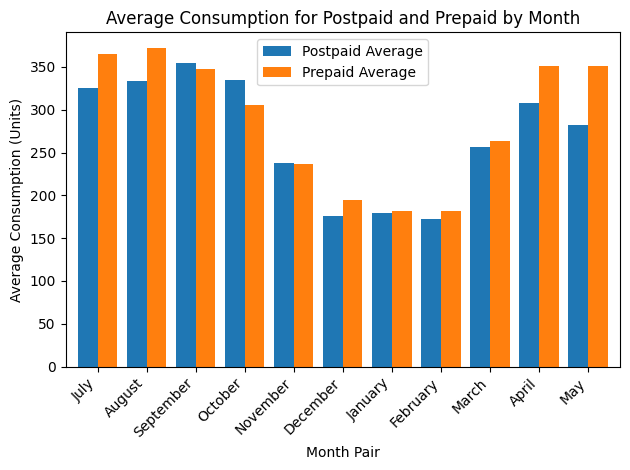

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = 'dataset.csv'
data = pd.read_csv(file_path, low_memory=False)

# Define the columns for prepaid and postpaid comparisons
prepaid_columns = [
    'pre_22_july_unit', 'pre_22_aug_unit', 'pre_22_sep_unit', 
    'pre_22_oct_unit', 'pre_22_nov_unit', 'pre_22_dec_unit',
    'pre_23_jan_unit', 'pre_23_feb_unit', 'pre_23_mar_unit', 
    'pre_23_apr_unit', 'pre_23_may_unit'
]

postpaid_columns = [
    'post_21_july_unit', 'post_21_august_unit', 'post_21_sep_unit', 
    'post_21_oct_unit', 'post_21_nov_unit', 'post_21_dec_unit',
    'post_22_jan_unit', 'post_22_feb_unit', 'post_22_mar_unit', 
    'post_22_april_unit', 'post_22_may_unit'
]

# Create a DataFrame for the pairwise comparison
comparison_data = data[postpaid_columns + prepaid_columns]

# Convert the selected columns to numeric, handling non-numeric entries by setting errors='coerce' to NaN
for col in postpaid_columns + prepaid_columns:
    comparison_data.loc[:, col] = pd.to_numeric(comparison_data[col], errors='coerce')

# Calculate the averages for each prepaid and postpaid month
postpaid_averages = comparison_data[postpaid_columns].mean()
prepaid_averages = comparison_data[prepaid_columns].mean()

# Create a DataFrame for the averages with labeled month pairs
average_df = pd.DataFrame({
    'Month Pair': [
        'July', 'August', 'September', 'October', 'November', 'December',
        'January', 'February', 'March', 'April', 'May'
    ],
    'Postpaid Average': postpaid_averages.values,
    'Prepaid Average': prepaid_averages.values
})

# Set Month Pair as index for better labeling
average_df.set_index('Month Pair', inplace=True)

# Create a bar plot to visualize the average consumption values
plt.figure(figsize=(10, 6))
average_df.plot(kind='bar', width=0.8)
plt.title('Average Consumption for Postpaid and Prepaid by Month')
plt.ylabel('Average Consumption (Units)')
plt.xlabel('Month Pair')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Average Consumption for Postpaid and Prepaid by Month.png", dpi=300)
# Show the plot
plt.show()


C:\Users\Shadow\AppData\Local\Temp\ipykernel_8744\743450338.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data[col] = pd.to_numeric(comparison_data[col], errors='coerce')


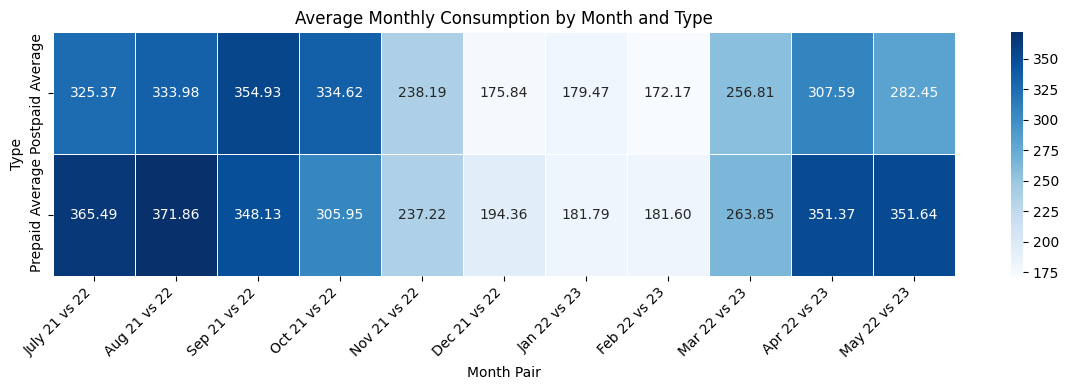

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = 'dataset.csv'
data = pd.read_csv(file_path, low_memory=False)

# Define the columns for prepaid and postpaid comparisons
prepaid_columns = [
    'pre_22_july_unit', 'pre_22_aug_unit', 'pre_22_sep_unit', 
    'pre_22_oct_unit', 'pre_22_nov_unit', 'pre_22_dec_unit',
    'pre_23_jan_unit', 'pre_23_feb_unit', 'pre_23_mar_unit', 
    'pre_23_apr_unit', 'pre_23_may_unit'
]

postpaid_columns = [
    'post_21_july_unit', 'post_21_august_unit', 'post_21_sep_unit', 
    'post_21_oct_unit', 'post_21_nov_unit', 'post_21_dec_unit',
    'post_22_jan_unit', 'post_22_feb_unit', 'post_22_mar_unit', 
    'post_22_april_unit', 'post_22_may_unit'
]

# Create a DataFrame for the pairwise comparison
comparison_data = data[postpaid_columns + prepaid_columns]

# Convert the selected columns to numeric, handling non-numeric entries by setting errors='coerce' to NaN
for col in postpaid_columns + prepaid_columns:
    comparison_data[col] = pd.to_numeric(comparison_data[col], errors='coerce')

# Calculate the averages for each prepaid and postpaid month
postpaid_averages = comparison_data[postpaid_columns].mean()
prepaid_averages = comparison_data[prepaid_columns].mean()

# Create a DataFrame for the averages with labeled month pairs
average_df = pd.DataFrame({
    'Month Pair': [
        'July 21 vs 22', 'Aug 21 vs 22', 'Sep 21 vs 22', 
        'Oct 21 vs 22', 'Nov 21 vs 22', 'Dec 21 vs 22',
        'Jan 22 vs 23', 'Feb 22 vs 23', 'Mar 22 vs 23', 
        'Apr 22 vs 23', 'May 22 vs 23'
    ],
    'Postpaid Average': postpaid_averages.values,
    'Prepaid Average': prepaid_averages.values
})

# Set Month Pair as index for better labeling
average_df.set_index('Month Pair', inplace=True)

# Convert to numeric types to ensure compatibility with the heatmap
average_df = average_df.apply(pd.to_numeric)

# Create a heatmap with annotated averages
plt.figure(figsize=(12, 4))
sns.heatmap(
    average_df.T,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Customize the plot
plt.title('Average Monthly Consumption by Month and Type')
plt.ylabel('Type')
plt.xlabel('Month Pair')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Average Monthly Consumption by Month and Type.png",dpi=300)
# Show the plot
plt.show()
